# <span style="color:#73aafa">1. Simple Web scrabing - Get fighter list from Wikipedia </span> 

In [1]:
# import libraries
import requests
import bs4
from csv import writer

In [2]:
# Get the data content from the wiki page
scrape_url= 'https://en.wikipedia.org/wiki/List_of_fighter_aircraft'
page = requests.get(scrape_url)
soup = bs4.BeautifulSoup(page.content, "html.parser")

# <span style="color:#73aafa">2. Inspect wiki html page </span> 

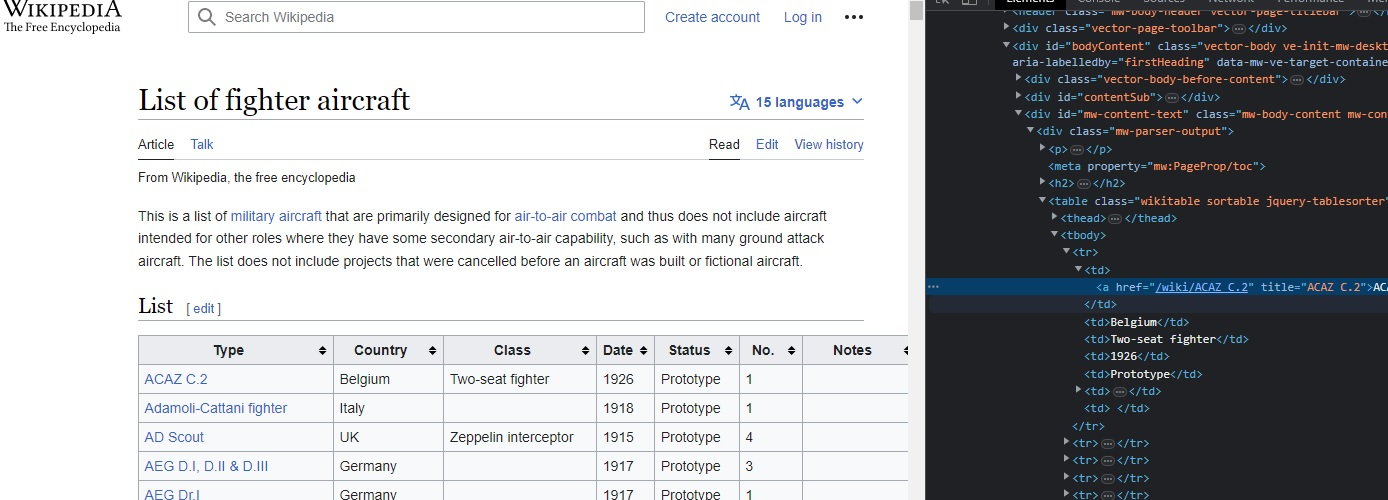

# <span style="color:#73aafa">3. Inspect dataset table </span> 

In [3]:
# Get the table with fighters data
table = soup.find('table')

In [4]:
# Inspect the table data
table

<table class="wikitable sortable">
<tbody><tr>
<th>Type</th>
<th>Country</th>
<th>Class</th>
<th>Date</th>
<th>Status</th>
<th>No.</th>
<th>Notes
</th></tr>
<tr>
<td><a href="/wiki/ACAZ_C.2" title="ACAZ C.2">ACAZ C.2</a></td>
<td>Belgium</td>
<td>Two-seat fighter</td>
<td>1926</td>
<td>Prototype</td>
<td><span data-sort-value="7000100000000000000♠">1</span></td>
<td>
</td></tr>
<tr>
<td><a href="/wiki/Adamoli-Cattani_fighter" title="Adamoli-Cattani fighter">Adamoli-Cattani fighter</a></td>
<td>Italy</td>
<td></td>
<td>1918</td>
<td>Prototype</td>
<td><span data-sort-value="7000100000000000000♠">1</span></td>
<td>
</td></tr>
<tr>
<td><a href="/wiki/AD_Scout" title="AD Scout">AD Scout</a></td>
<td>UK</td>
<td>Zeppelin interceptor</td>
<td>1915</td>
<td>Prototype</td>
<td><span data-sort-value="7000400000000000000♠">4</span></td>
<td>
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/AEG_D.I,_D.II_%26_D.III" title="AEG D.I, D.II &amp; D.III">AEG D.I, D.II &amp; D.III</a></td>
<td>Ger

In [5]:
# Get the rows from the table with fighters data
# In html 'tr' --> row
rows = table.find_all("tr")

In [6]:
# Inspect the rows from the table with fighters data
rows

[<tr>
 <th>Type</th>
 <th>Country</th>
 <th>Class</th>
 <th>Date</th>
 <th>Status</th>
 <th>No.</th>
 <th>Notes
 </th></tr>,
 <tr>
 <td><a href="/wiki/ACAZ_C.2" title="ACAZ C.2">ACAZ C.2</a></td>
 <td>Belgium</td>
 <td>Two-seat fighter</td>
 <td>1926</td>
 <td>Prototype</td>
 <td><span data-sort-value="7000100000000000000♠">1</span></td>
 <td>
 </td></tr>,
 <tr>
 <td><a href="/wiki/Adamoli-Cattani_fighter" title="Adamoli-Cattani fighter">Adamoli-Cattani fighter</a></td>
 <td>Italy</td>
 <td></td>
 <td>1918</td>
 <td>Prototype</td>
 <td><span data-sort-value="7000100000000000000♠">1</span></td>
 <td>
 </td></tr>,
 <tr>
 <td><a href="/wiki/AD_Scout" title="AD Scout">AD Scout</a></td>
 <td>UK</td>
 <td>Zeppelin interceptor</td>
 <td>1915</td>
 <td>Prototype</td>
 <td><span data-sort-value="7000400000000000000♠">4</span></td>
 <td>
 </td></tr>,
 <tr>
 <td><a class="mw-redirect" href="/wiki/AEG_D.I,_D.II_%26_D.III" title="AEG D.I, D.II &amp; D.III">AEG D.I, D.II &amp; D.III</a></td>
 <td>Ge

In [7]:
# Let's print the data from the table (except row 1 which is the header)
# In html 'tr' --> row, 'th' --> header, 'td'--> data
for row in rows[1:]:
    cells = row.find_all(['td','th'])
    cells_text = [cell.get_text(strip = True) for cell in cells]
    print(cells_text)

['ACAZ C.2', 'Belgium', 'Two-seat fighter', '1926', 'Prototype', '1', '']
['Adamoli-Cattani fighter', 'Italy', '', '1918', 'Prototype', '1', '']
['AD Scout', 'UK', 'Zeppelin interceptor', '1915', 'Prototype', '4', '']
['AEG D.I, D.II & D.III', 'Germany', '', '1917', 'Prototype', '3', '']
['AEG Dr.I', 'Germany', '', '1917', 'Prototype', '1', '']
['Aerfer Ariete', 'Italy', '', '1958', 'Prototype', '2', '']
['Aerfer Sagittario 2', 'Italy', 'Lightweight fighter', '1956', 'Prototype', '2', '']
['Aero Ae 02', 'Czechoslovakia', '', '1920', 'Prototype', '1', '']
['Aero Ae 04', 'Czechoslovakia', '', '1921', 'Prototype', '1', '']
['Aero A.18', 'Czechoslovakia', '', '1923', 'Production', '20', '']
['Aero A.19', 'Czechoslovakia', '', '1923', 'Prototype', '1', '']
['Aero A.20', 'Czechoslovakia', '', '1923', 'Prototype', '1', '']
['Aero A.102', 'Czechoslovakia', '', '1934', 'Prototype', '1', '']
['Aeromarine PG-1', 'US', 'Fighter-bomber', '1922', 'Prototype', '1', '']
['Aeronautica Umbra Trojani AUT

# <span style="color:#73aafa">4. Export data content into a csv file</span> 

In [8]:
# export all data - content into a csv file
with open('fighter_list.csv','w', encoding='utf8',newline='') as f:
    thewriter = writer(f)
    header = ['Type','Country','Class','Date','Status','No.','Notes']
    thewriter.writerow(header)
    
    for row in rows[1:]:
        cells = row.find_all(['td','th'])
        cells_text = [cell.get_text(strip = True) for cell in cells]
        thewriter.writerow(cells_text)

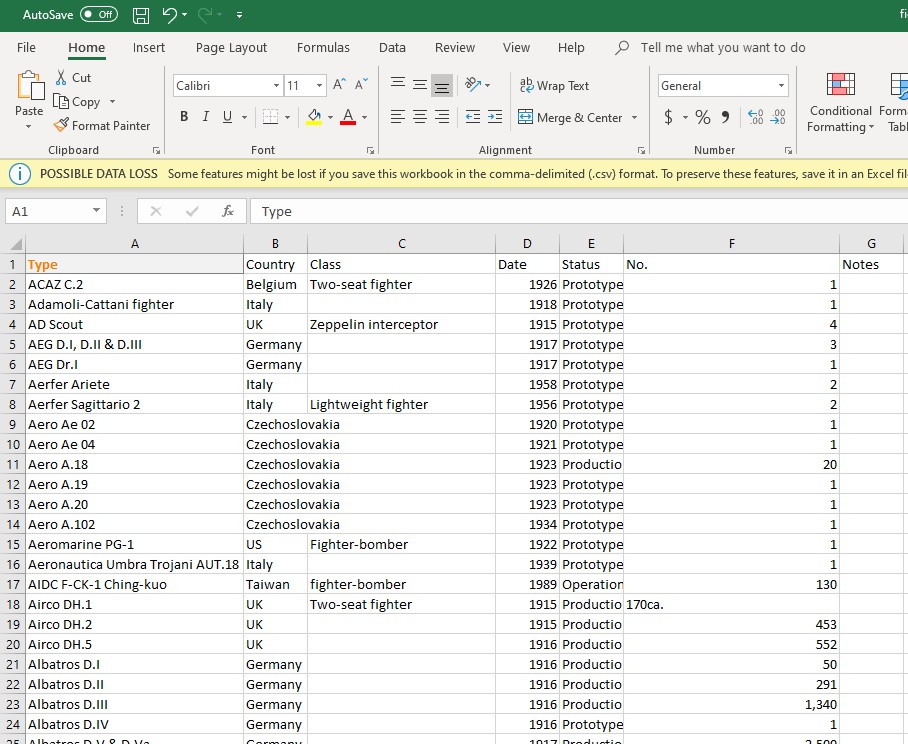